Adınız: Muhammed Mert

Soyadınız: Sayan

Okul No: 2212721028

GitHub Repo Bağlantısı: https://github.com/MertSayan/CNN_siniflandirma

In [ ]:
# Google Drive'ı bağlıyorum.
# Dataset'im Drive üzerinde olduğu için buradan okuyacağım.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Dataset klasör yollarını tanımlıyorum.
# Aynı train / val / test ayrımını kullanıyorum.
import os

base_dir = "/content/drive/MyDrive/CNN_Dis_Odevi/dataset_split"

train_dir = base_dir + "/train"
val_dir   = base_dir + "/val"
test_dir  = base_dir + "/test"

print("Train klasörleri:", os.listdir(train_dir))
print("Val klasörleri:", os.listdir(val_dir))
print("Test klasörleri:", os.listdir(test_dir))

Train klasörleri: ['dis_fircasi', 'dis_macunu']
Val klasörleri: ['dis_fircasi', 'dis_macunu']
Test klasörleri: ['dis_fircasi', 'dis_macunu']


In [ ]:
# Model2 aşamasında da Keras ImageDataGenerator kullanıyorum.
# Ancak bu aşamada henüz veri artırımı (augmentation) uygulamıyorum. (model 3 de deneyeceğim veri arttırımını)
# Sadece piksel değerlerini [0,1] aralığına çekiyorum (rescale).
#rescale , görüntülerin piksel değerleri (0-255 aralığında) rescale=1./255 komutu ile 0-1 aralığına normalize edilir.
    #Bu işlem, derin öğrenme modelinin daha hızlı, daha kararlı ve daha verimli bir şekilde öğrenmesini sağlamak
      # için kritik bir ön işlemdir. Büyük sayısal değerlerin (0-255) modelin optimizasyon sürecinde dengesizlik yaratmasını önler.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_generator = val_datagen.flow_from_directory(
    directory=val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

Found 99 images belonging to 2 classes.
Found 21 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [ ]:
# Model2 için sıfırdan (from scratch) basit bir CNN mimarisi tanımlıyorum.
#  Conv + Pool + Dense yapısını kullanıyorum.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model2 = Sequential()


# --- ÖZELLİK ÇIKARMA BÖLÜMÜ (Feature Extraction) ---
# 1. Convolution bloğu
# Conv2D: 32 adet filtre (özellik haritası) kullanıyoruz.
# (3, 3): Her bir filtrenin boyutu 3x3 pikseldir.
# activation=relu: Negatif değerleri sıfırlayarak doğrusallığı bozar (non-linearity).
# input_shape=(128, 128, 3): Modele giren ilk katman olduğu için (Genişlik, Yükseklik, Kanal) belirtilir.
# Görüntü boyutu 128x128 ve renkli (RGB) olduğu için 3 kanallıdır.
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model2.add(MaxPooling2D((2, 2)))

# 2. Convolution bloğu
# Conv2D: Daha karmaşık özellikleri öğrenmek için filtre sayısını 64'e çıkarıyoruz.
# Genel kural, derinlik arttıkça filtre sayısını artırmaktır.
model2.add(Conv2D(64, (3, 3), activation='relu'))
# MaxPooling2D: Boyut indirgemeye devam ediyoruz.
model2.add(MaxPooling2D((2, 2)))

# --- SINIFLANDIRMA BÖLÜMÜ (Classification) ---

# Flatten: 2 boyutlu özellik haritasını (çıkarılan tüm özellikleri) tek bir vektöre düzleştirir.
# Bu işlem, özelliklerin 'Fully Connected' (Yoğun/Dense) katmanlara giriş yapmasını sağlar.
model2.add(Flatten())

# Fully connected (Yoğun) katman
# Dense(128): Düzleştirilmiş vektördeki özellikler arasında yüksek seviyeli ilişkileri öğrenir.
# 128 nöronlu bu katman, karmaşık örüntüleri sınıflandırma için hazırlar.
model2.add(Dense(128, activation='relu'))
# Dropout(0.5): Rastgele nöronların %50'sini (0.5) eğitim sırasında devre dışı bırakır.
# Bu, modelin belirli nöronlara aşırı bağımlı olmasını önleyerek, aşırı uyum (overfitting) riskini azaltır.
model2.add(Dropout(0.5))

# Çıkış katmanı (2 sınıf)
# Dense(2): Projemizde 2 sınıf (diş fırçası / diş macunu) olduğu için 2 nöron kullanılır.
# activation='softmax': Çıkışları olasılıklara dönüştürür.
# 2 nöronun çıktıları toplamı 1'e eşit olacak şekilde normalleştirilir.
# Bu, her sınıfın tahmin edilen olasılığını verir.
model2.add(Dense(2, activation='softmax'))

# Model özetini yazdırıyorum
model2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,578 (28.20 MB)

 Trainable params: 7,392,578 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Model2’de transfer learning kullanmadım. Basit bir CNN mimarisi tanımlayarak modeli sıfırdan eğittim. Tüm katmanlar trainable olduğu için model tamamen sıfırdan eğitildi.

In [ ]:
# Model2'yi derliyorum.
# İki sınıflı bir problem olduğu için categorical_crossentropy kullanıyorum.
# Optimizer olarak Adam seçiyorum.
# Accuracy metriğini takip ediyorum.

model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# Model2'yi sıfırdan eğitiyorum.
# Eğitim train seti ile yapılıyor,
# validation seti ile her epoch sonunda performans kontrol ediliyor.
# history değişkeni accuracy ve loss değerlerini tutacak.

history2 = model2.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.5928 - loss: 1.7464 - val_accuracy: 0.5238 - val_loss: 0.9040
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.4575 - loss: 1.3032 - val_accuracy: 0.4762 - val_loss: 0.6461
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.5723 - loss: 0.7297 - val_accuracy: 0.7143 - val_loss: 0.5885
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.8141 - loss: 0.5634 - val_accuracy: 0.7619 - val_loss: 0.5102
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.8298 - loss: 0.4662 - val_accuracy: 0.9048 - val_loss: 0.3566
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.8059 - loss: 0.4887 - val_accuracy: 0.5714 - val_loss: 0.8114
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.8082 - loss: 0.4043 - val_accuracy: 0.8571 - val_loss: 0.3035
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.8858 - loss: 0.3346 - val_accuracy: 0.8571 - val_loss: 0

Model2, sıfırdan eğitildiği için başlangıçta kararsız öğrenme göstermiştir. Epoch ilerledikçe temel görsel özellikleri (şekil, kontur, uzunluk) öğrenmiş ancak veri setinin sınırlı olması nedeniyle doğrulama doğruluğunda dalgalanmalar gözlemlenmiştir.

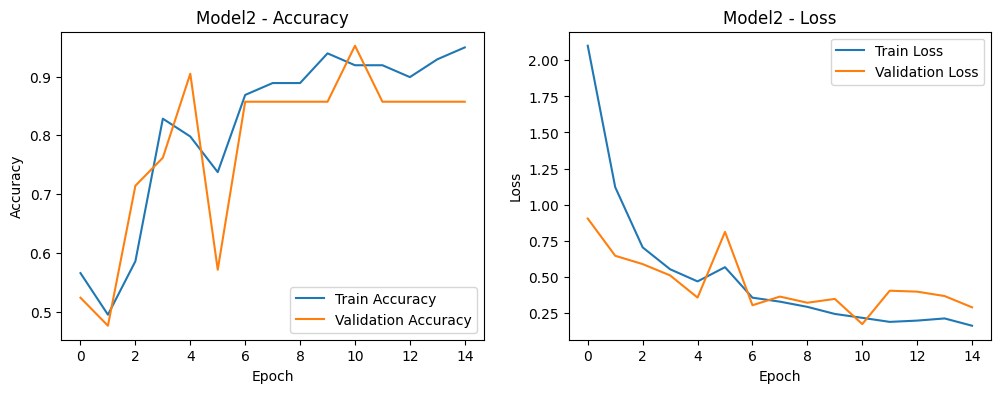

In [ ]:
import matplotlib.pyplot as plt

# Accuracy grafiği
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model2 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss grafiği
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model2 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Validation loss değerlerinin genel olarak düşmesi, modelin öğrenme sürecinin sağlıklı olduğunu ancak veri çeşitliliğinin sınırlı olması nedeniyle kararsızlık yaşandığını göstermektedir.

In [ ]:
# Model2'nin test seti üzerindeki performansını ölçüyorum

test_loss2, test_accuracy2 = model2.evaluate(test_generator)

print(f"Model2 Test Accuracy: {test_accuracy2:.4f}")
print(f"Model2 Test Loss: {test_loss2:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 824ms/step - accuracy: 0.7917 - loss: 0.5975
Model2 Test Accuracy: 0.7917
Model2 Test Loss: 0.5975


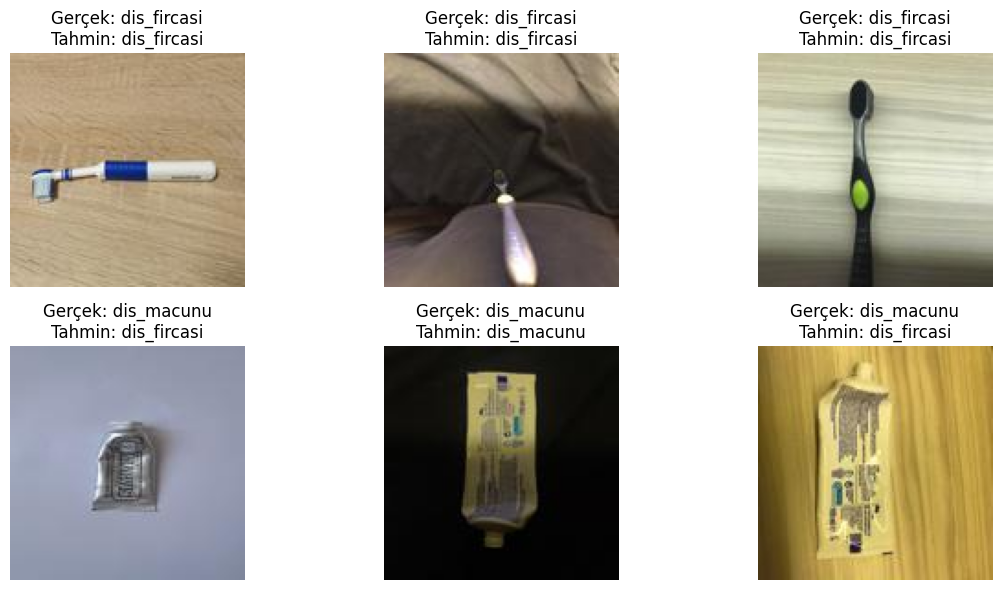

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Sınıf isimleri (klasör isimlerinden geliyor)
class_names = list(test_generator.class_indices.keys())

test_images = []
test_labels = []

# Her sınıftan rastgele 3 görsel seçiyorum
for class_name in class_names:
    class_path = test_generator.directory + '/' + class_name
    images = os.listdir(class_path)
    selected = random.sample(images, min(3, len(images)))

    for img_name in selected:
        test_images.append(class_path + '/' + img_name)
        test_labels.append(class_name)

plt.figure(figsize=(12, 6))

for i, img_path in enumerate(test_images):
    img = load_img(img_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model2.predict(img_array, verbose=0)
    predicted_class = class_names[np.argmax(prediction)]

    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Gerçek: {test_labels[i]}\nTahmin: {predicted_class}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Model2, diş macunu görsellerinde şekil benzerliği nedeniyle bazı örnekleri diş fırçası olarak yanlış sınıflandırmıştır. Bu durum modelin yüksek seviyeli semantik özellikleri yeterince ayırt edemediğini göstermektedir.

Model1, ImageNet üzerinde önceden eğitilmiş olduğu için az veriyle daha yüksek doğruluk elde etti. Model2 ise tamamen sıfırdan öğrenen bir CNN olduğu için performansı daha düşük kaldı.